# Import libraries

In [1]:
import os
import sys
sys.path.insert(0, "../src")

import gcsfs
import pandas as pd

from utils.vis_utils import fetch_data, vis_data

In [2]:
gfs = gcsfs.GCSFileSystem(project="smle-attribution-d237")

# Define variables

In [3]:
root = "gs://hm-images-bucket/"
img_path = "images"
annotation_path = "annotations"

# Read data

In [4]:
data = pd.read_csv(os.path.join(root, annotation_path, "full_fit_gcai.csv"),
                   header=None, names=["mode", "paths", "labels"])
print(data.shape)
data.head()

(71315, 3)


,mode,paths,labels
0,TRAINING,gs://hm-images-bucket/images/extraLarge/descri...,fitted
1,TRAINING,gs://hm-images-bucket/images/extraLarge/descri...,fitted
2,TRAINING,gs://hm-images-bucket/images/extraLarge/lookbo...,fitted
3,TRAINING,gs://hm-images-bucket/images/extraSmall/descri...,fitted
4,TRAINING,gs://hm-images-bucket/images/extraSmall/descri...,fitted


In [5]:
data.labels.value_counts()

oversized         14580
regularfit        13766
relaxedfit        13445
fitted            13158
loosefit           9281
slimfit            4901
skinnyfit          1672
musclefit           340
superskinnyfit      172
Name: labels, dtype: int64

# Visualize

In [6]:
lab = "superskinnyfit"
num_samples = 5

In [7]:
img_list = fetch_data(data, lab, num_samples, gfs)

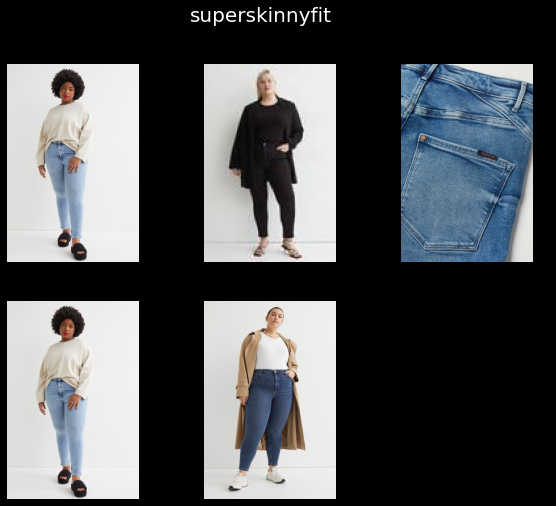

In [8]:
vis_data(img_list, lab)